In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("cp_new_reg1.csv")
#del df['branch-misses','iTLB-load-misses','L1-icache-load-misses','LLC-load-misses','LLC-store-misses']
# del df['cache-misses']
# del df['LLC-load-misses']

In [3]:
df.head()


df

,branch-load-misses,branch-misses,iTLB-load-misses,dTLB-load-misses,dTLB-store-misses,L1-icache-load-misses,L1-dcache-load-misses,l2_rqsts.code_rd_miss,l2_rqsts.all_demand_miss,l2_rqsts.rfo_miss,cache-misses,LLC-load-misses,LLC-store-misses,CPI
0,1107579,1121855,1758,29058,1035,20224,24104987,11629,1174064,7900,4768643,236852,1428,2.07
1,1198418,1186896,483,28567,982,13140,23974334,11865,1169602,6929,6111092,452790,1271,1.70
2,863808,841773,502,20417,808,17117,22963343,14523,1143655,6610,5499109,372100,1264,1.81
3,846999,865360,447,30092,766,12494,22736698,11575,1169371,6864,4740953,240511,1395,2.04
4,947442,932490,476,20949,794,14803,19806289,10104,1117789,5878,4989461,244881,1320,2.06
5,1153806,1171597,444,28907,923,12696,17411968,14294,820459,4382,6294801,375960,1165,1.70
6,940942,1000184,4850,30538,947,12669,23440266,10217,1052300,5261,6699650,512923,1275,1.58
7,1095997,1113970,828,28038,535,13476,23280308,13152,1123365,7114,4924114,275647,1143,1.79
8,643595,765955,6863,26009,1184,49810,23037700,10858,1124893,8187,5490002,271996,1488,2.05
9,878773,867228,446,19070,758,13933,20595154,11946,1108475,6958,5515471,283550,1506,2.03


In [4]:
df.shape

(1089, 14)

In [5]:
print(df.corr())

                          branch-load-misses  branch-misses  iTLB-load-misses  \
branch-load-misses                  1.000000       0.982179          0.316491   
branch-misses                       0.982179       1.000000          0.315567   
iTLB-load-misses                    0.316491       0.315567          1.000000   
dTLB-load-misses                   -0.316873      -0.336429          0.229135   
dTLB-store-misses                   0.425286       0.440497          0.277305   
L1-icache-load-misses               0.189840       0.143062          0.249444   
L1-dcache-load-misses              -0.453384      -0.434895         -0.454658   
l2_rqsts.code_rd_miss               0.090212       0.070601         -0.097984   
l2_rqsts.all_demand_miss           -0.526644      -0.545341          0.090599   
l2_rqsts.rfo_miss                   0.283967       0.312007         -0.161323   
cache-misses                       -0.342643      -0.358361          0.136885   
LLC-load-misses             

In [6]:
print(df.describe())

       branch-load-misses  branch-misses  iTLB-load-misses  dTLB-load-misses  \
count        1.089000e+03   1.089000e+03       1089.000000       1089.000000   
mean         1.448287e+06   1.450259e+06        830.266299       5026.346189   
std          4.422787e+05   4.203159e+05       1094.524988       7092.194349   
min          6.346270e+05   7.477030e+05          5.000000        362.000000   
25%          1.312104e+06   1.319932e+06        401.000000       1636.000000   
50%          1.455957e+06   1.457749e+06        628.000000       2089.000000   
75%          1.530158e+06   1.537235e+06        842.000000       3300.000000   
max          6.341377e+06   5.726934e+06      10574.000000      33513.000000   

       dTLB-store-misses  L1-icache-load-misses  L1-dcache-load-misses  \
count        1089.000000            1089.000000           1.089000e+03   
mean          849.494949           23945.322314           2.439673e+07   
std           939.585856           14591.733125          

In [7]:
li=['branch-load-misses',
       'dTLB-load-misses', 'dTLB-store-misses',
       'L1-dcache-load-misses', 'l2_rqsts.code_rd_miss',
       'l2_rqsts.all_demand_miss', 'l2_rqsts.rfo_miss', 'cache-misses',
    'branch-misses','iTLB-load-misses','L1-icache-load-misses','LLC-load-misses','LLC-store-misses']

In [8]:
X = df[li]
y = df['CPI']

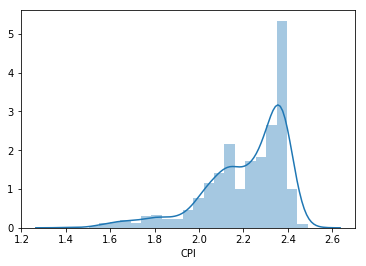

In [9]:
sns.distplot(df['CPI']);

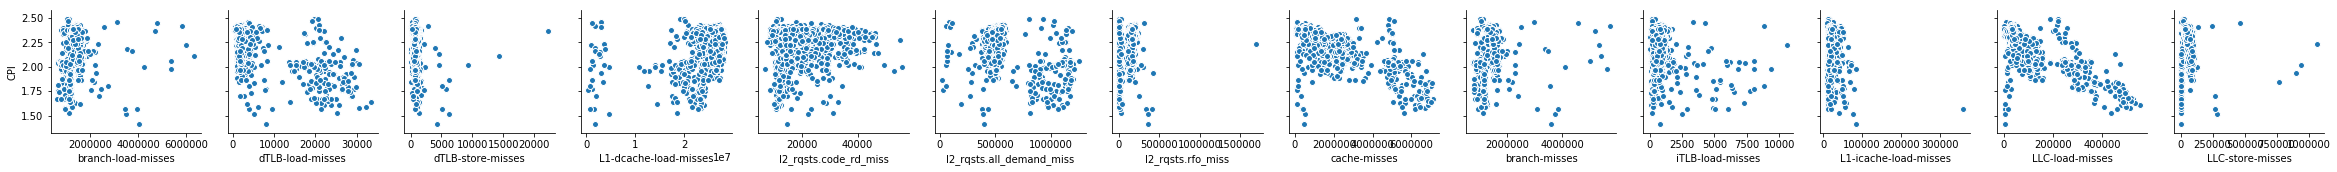

In [10]:
sns.pairplot(df, x_vars=li, y_vars='CPI', aspect=1, kind='scatter')
plt.show()

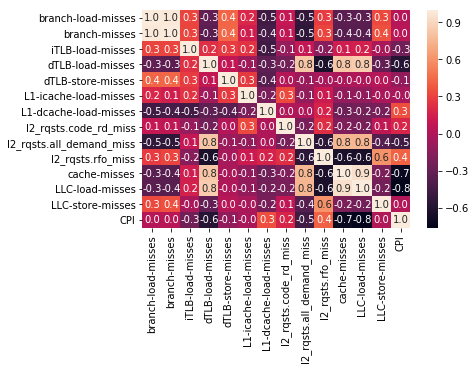

In [11]:
plt.show()
sns.heatmap(df.corr(), annot=True, fmt=".1f")

In [12]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [13]:
y_train.shape

(871,)

In [14]:
y_test.shape

(218,)

In [15]:
reg_model = linear_model.LinearRegression()

In [16]:
#Fitting the Multiple Linear Regression model
# reg_model = LinearRegression().fit(X_train, y_train)
# print(f"Linear Regression-Training set score: {reg_model.score(X_train, y_train):.2f}")
# print(f"Linear Regression-Test set score: {reg_model.score(X_test, y_test):.2f}")

In [17]:
# from sklearn.linear_model import Ridge
# reg_model = Ridge(alpha=0.9).fit(X_train, y_train)
# print(f"Ridge Regression-Training set score: {reg_model.score(X_train, y_train):.2f}")
# print(f"Ridge Regression-Test set score: {reg_model.score(X_test, y_test):.2f}")

In [18]:

# reg_model=LinearRegression(positive= True)
reg_model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  2.4412619340959334


[('branch-load-misses', 6.084915092705238e-08),
 ('dTLB-load-misses', 5.0704589652712345e-06),
 ('dTLB-store-misses', 1.7416633276773632e-06),
 ('L1-dcache-load-misses', 1.307331902787261e-09),
 ('l2_rqsts.code_rd_miss', 1.4522121728394697e-06),
 ('l2_rqsts.all_demand_miss', 3.583066652709511e-08),
 ('l2_rqsts.rfo_miss', 1.0243470703122759e-07),
 ('cache-misses', 2.005136193315432e-09),
 ('branch-misses', -1.4584146934538075e-07),
 ('iTLB-load-misses', -5.287227008733412e-06),
 ('L1-icache-load-misses', -1.845360212822336e-06),
 ('LLC-load-misses', -1.7603900219506262e-06),
 ('LLC-store-misses', -3.2737193490061765e-07)]

In [20]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [21]:
print("Prediction for test set: {}".format(y_pred))
print()
print("Prediction for train set: {}".format(x_pred))

Prediction for test set: [2.31822127 2.27783515 2.23509966 2.31485657 2.16179255 2.18001933
 2.2977963  2.1046832  2.31135072 2.27738018 2.34139263 2.27265344
 2.29072054 2.17830003 2.05477267 2.36738502 2.32188654 2.31392134
 2.37967345 2.34544893 2.10911565 1.67447897 2.28274199 2.31923028
 2.28283501 2.29726392 2.25503659 2.1494151  1.89107023 2.329426
 2.31474646 2.31115709 2.08898897 2.25249613 1.79091961 2.29413856
 2.35042098 2.29478275 2.30386305 2.22682476 2.3232699  2.32331436
 2.18290039 1.93772136 2.29937906 2.17267422 2.19831352 2.33891657
 2.30586803 1.89323876 2.12988824 2.23347181 2.16533288 2.13604249
 2.11872716 2.28423013 2.32577911 2.33591224 2.15289456 2.32422521
 2.29572213 2.15870833 2.34448364 1.9848445  2.16916289 2.28468148
 1.99876897 2.34116341 2.32997407 2.3098191  2.27084881 2.34705652
 2.0559207  1.7225674  2.26067635 2.29111051 2.26335686 2.31335357
 2.32696504 2.22291814 2.31987105 1.99073114 2.17282701 2.28461511
 2.17052417 2.10032793 2.27062479 2.110

In [22]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred , '  Residue': y_test-y_pred})


In [23]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
print('F-ststistic value : ' , r2/mse)

print()
print()
mae = metrics.mean_absolute_error(y_train, x_pred)
mse = metrics.mean_squared_error(y_train, x_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_train, x_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
# print('Adjusted R^2 value : ' , adjusted_r^2)


Mean Absolute Error: 0.07129592886346667
Mean Square Error: 0.009269188513930857
Root Mean Square Error: 0.09627662496125867
R^2 value : 0.6832702050559596
F-ststistic value :  10.38673717948044


Mean Absolute Error: 0.07579171390503046
Mean Square Error: 0.011492562146778946
Root Mean Square Error: 0.10720336816900365
R^2 value : 0.6832702050559596


In [24]:
#display adjusted R-squared
1 - (1-reg_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.6794399842798922

In [25]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
p_values=model.summary2().tables[1]['P>|t|']
p_values

const                       1.667099e-252
branch-load-misses           1.895268e-01
dTLB-load-misses             3.344976e-04
dTLB-store-misses            7.014205e-01
L1-dcache-load-misses        3.347884e-01
l2_rqsts.code_rd_miss        2.302924e-03
l2_rqsts.all_demand_miss     3.920698e-01
l2_rqsts.rfo_miss            1.964177e-01
cache-misses                 7.771572e-01
branch-misses                4.706324e-03
iTLB-load-misses             1.938962e-01
L1-icache-load-misses        5.165513e-10
LLC-load-misses              5.831115e-48
LLC-store-misses             8.190386e-05
Name: P>|t|, dtype: float64